# <div style="text-align:center; font-size:40px;"><span style="color:#3A506B">❗ Important ❗ </span></div>

Hey there, whether you come from the ✅ Comprehensive Overview on NLP for Beginners 🥳  notebook or you click on this notebook directly, I just want to let you know that this notebook is part 2.1 to the NLP beginner series. Here are the links to the whole series:
    
**✅ Comprehensive Overview on NLP for Beginners 🥳 (collection of all series)** <br>
 https://www.kaggle.com/code/crxxom/comprehensive-overview-on-nlp-for-beginners
 
    
**🔴 NLP Beginner Series Part 1: NLP Preprocessing** <br>
https://www.kaggle.com/code/crxxom/nlp-beginner-series-part-1-nlp-preprocessing

**🟡 NLP Beginner Series Part 2.1: Word Embeddings** <br>
https://www.kaggle.com/code/crxxom/nlp-beginner-series-part-2-1-word-embeddings

**🟢 NLP Beginner Series Part 2.2: Embedding Models** <br>
https://www.kaggle.com/code/crxxom/nlp-beginner-series-part-2-2-embedding-models

**🟣 NLP Beginner Series Part 3: Case Study** <br>
 https://www.kaggle.com/code/crxxom/nlp-beginner-series-part-3-case-study

<a id="case-study"></a><div style="text-align:center; font-size:40px;"><span style="color:#3A506B">🚨 Case Study: NLP with Disaster Tweet 🚨</span></div>

# <div style="text-align:center; font-size:40px;"><span style="color:#3A506B">🔥  Overview of the Notebook  🔥</div>


## 🔎 Sessions covered in this notebook

#### 🟢 [Understanding the data](#understanding-the-data)

#### 🟢 [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)

#### 🟢 [Pipeline](#pipeline)

#### 🟢 [Model 1: Bag of n-grams](#model-1)

#### 🟢 [Model 2: TF-IDF](#model-2)

#### 🟢 [Model 3: fastText](#model-3)

#### 🟢 [Model 4: BERT](#model-4)

#### 🟢 [How to improve your model](#improvements)





# <a id="understanding-the-data"></a><div style="text-align:center; font-size:40px;"><span style="color:#3A506B"> 1️⃣ Understanding the data </span></div>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Some fundamental libraries that you will need to use throughout the tutorial
# for libraries for more specific tasks, I will be importing them seperately in each block
# for learning purpose, so you know which library corresponds to which function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # not part of pre-requisite, but it is just some data visualization tools, which is not our the focus of the notebook
import seaborn as sns # another data visualization tool

# import data

train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<div style="width:100%;text-align: center;"> <img align=middle src="https://i.imgur.com/qiqMMnN.png" style="height: 300px;"> </div>

In [10]:
train_df.shape

# We see that the training df consists of 7613 rows

(7613, 5)

In [11]:
train_df.target.value_counts()

# We see that the target is slightly imbalanced
# to deal with imbalance dataset, one can apply a lot of difference techniques such as 
# downsampling, in this tutorial, we will just use the entire dataset

0    4342
1    3271
Name: target, dtype: int64

In [12]:
# checking for null value

train_df.isna().sum()

# In this notebook, we will just be using the text column and the target column for simplicity

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

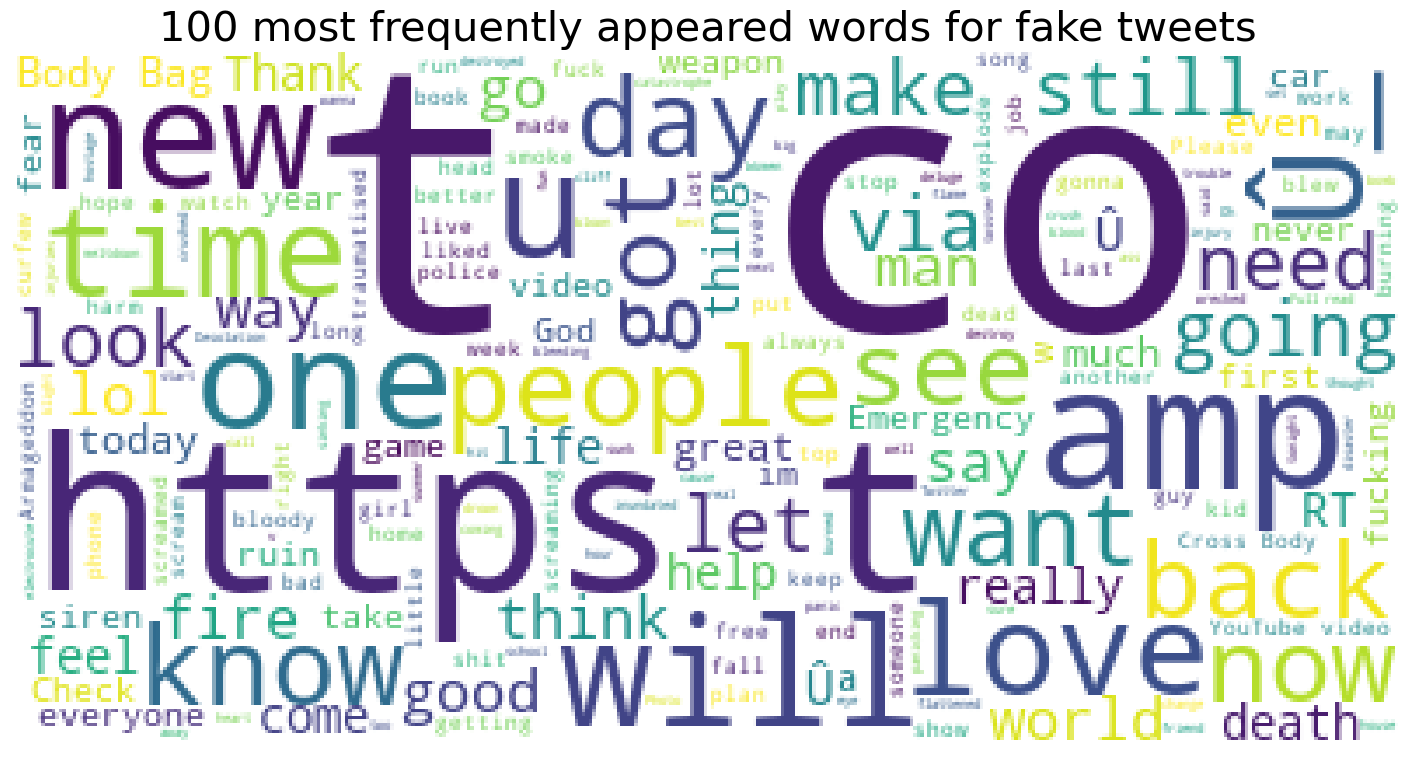

In [13]:
# Some cool method to give you an overview to some of the most frequently appearing words

# pip install the corresponding libraries if you have not

from PIL import Image
from wordcloud import WordCloud

wc = WordCloud(
    background_color='white', 
    max_words=200,  # number of word display in the wordcloud
)

# join text messages together
joined_text = ''
for text in train_df.loc[train_df['target']== 0, 'text']: #target == 0 refer to all the fake tweets
    joined_text = joined_text + ' ' + text + ' '

wc.generate(joined_text) 
plt.figure(figsize=(18,10))
plt.title('100 most frequently appeared words for fake tweets', 
          fontdict={'size': 30})
plt.imshow(wc)
plt.axis("off")
plt.show()

# we can see some random words and even swear words as well

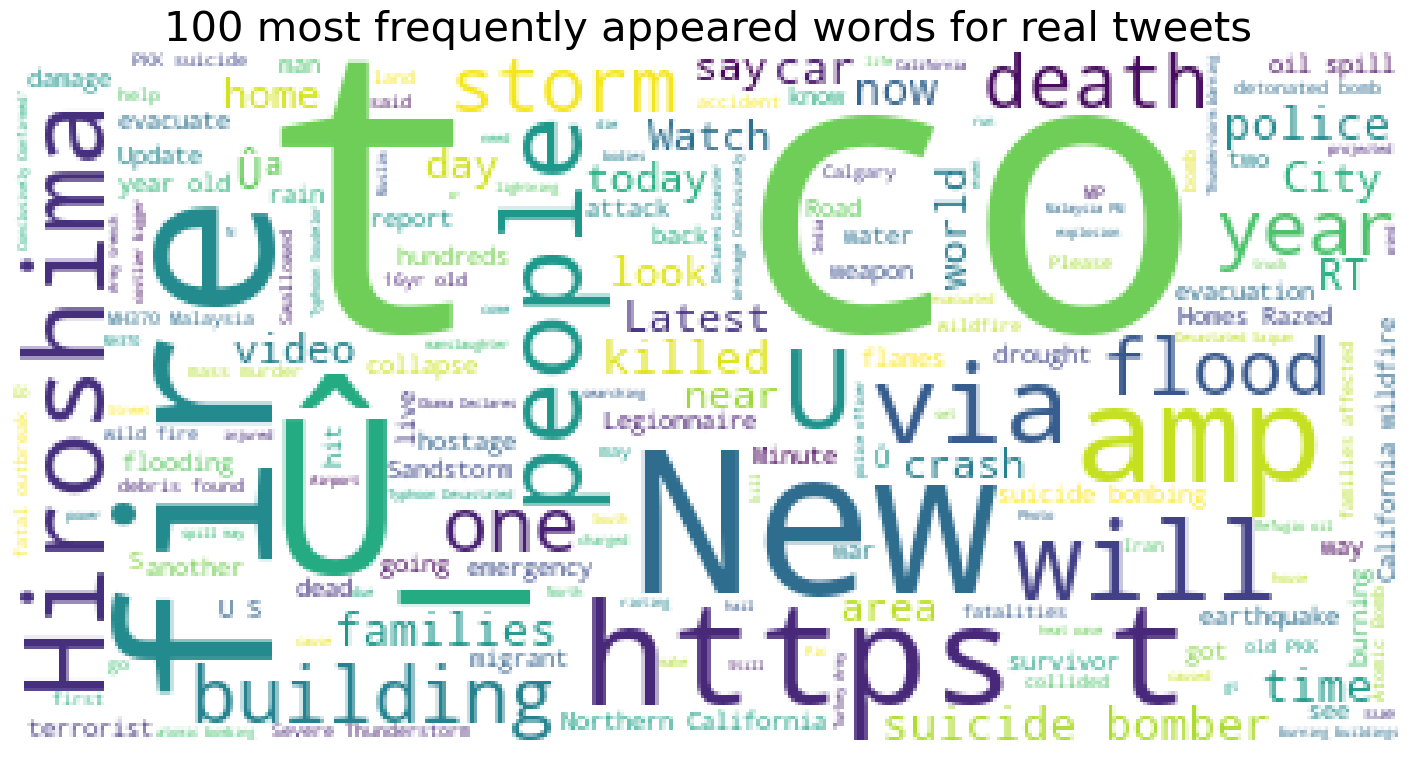

In [14]:
from PIL import Image
from wordcloud import WordCloud


wc = WordCloud(
    background_color='white', 
    max_words=200, 
)

joined_text = ''
for text in train_df.loc[train_df['target']== 1, 'text']:
    joined_text = joined_text + ' ' + text + ' '
    
wc.generate(joined_text)
plt.figure(figsize=(18,10))
plt.title('100 most frequently appeared words for real tweets', 
          fontdict={'size': 30})
plt.imshow(wc)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Distribution of word counts in each tweet in train data')

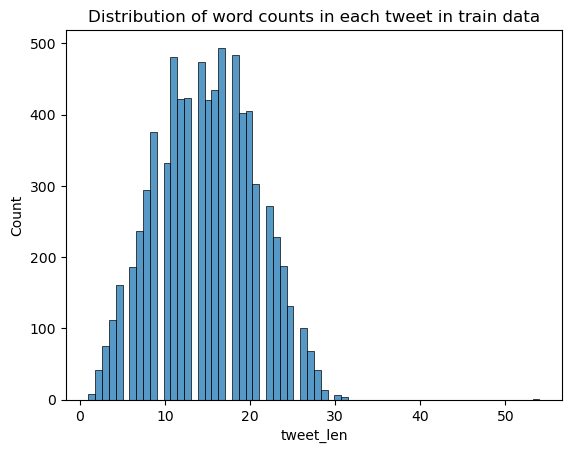

In [15]:
train_df['tweet_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))

sns.histplot(train_df['tweet_len'])

plt.title("Distribution of word counts in each tweet in train data")

# <a id="data-cleaning-and-preprocessing"></a><div style="text-align:center; font-size:40px;"><span style="color:#3A506B"> 2️⃣ Data Cleaning and Preprocessing </span></div>

In [16]:
# As we mentioned, we will only be using the text column and target

train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

train_df = train_df.drop(['id', 'keyword', 'location'],axis=1)

train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


Cleaning text data is always a very important step, we want to reduce the 'noise' in our dataset as much as possible to give a more accurate results. Cleaning tweets is a fairly long process and a good cleaning will require a lot of work and coding. If you want to learn more about how to pros are cleaning the text for this competition, here are some notebooks that did a very detailed cleaning using regular expression: 

https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert

https://www.kaggle.com/code/shahules/basic-eda-cleaning-and-glove


In [17]:
# code from https://www.kaggle.com/code/shahules/basic-eda-cleaning-and-glove

import re # regular expression
import string


def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

train_df['text']= train_df['text'].apply(remove_URL)
train_df['text']= train_df['text'].apply(remove_html)
train_df['text']= train_df['text'].apply(remove_emoji)
train_df['text']= train_df['text'].apply(remove_punct)


train_df.head()

,text,target
0,Our Deeds are the Reason of this earthquake Ma...,1
1,Forest fire near La Ronge Sask Canada,1
2,All residents asked to shelter in place are be...,1
3,13000 people receive wildfires evacuation orde...,1
4,Just got sent this photo from Ruby Alaska as s...,1


In [18]:
# Some extra functions I added

def remove_newline(text):
    newline = re.compile(r'\n')
    return newline.sub(r'',text)

def remove_extra_space(text):
            return re.sub(r'\s+', ' ', text)

train_df['text'] = train_df['text'].apply(remove_newline)
train_df['text'] = train_df['text'].apply(lambda x: x.lower()) # apply lowercase
train_df.head()

,text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,13000 people receive wildfires evacuation orde...,1
4,just got sent this photo from ruby alaska as s...,1


### ✍ Test your knowledge

Try to implement your own function of lemmatization using spaCy.

In [19]:
#  Your code here, scroll down to see my version of implementation
# ---------------------------------------------














# ---------------------------------------------

In [21]:
# Applying lemmatization to the text

import spacy 

nlp = spacy.load("en_core_web_lg")

def lemmatization(text):
    processed_text = []
    doc = nlp(text)
    for token in doc:
        processed_text.append(token.lemma_)
    
    return ' '.join(processed_text)

train_df['text'] = train_df['text'].apply(lemmatization)

Now try to implement a function that remove all the stop words

In [ ]:
#  Your code here, scroll down to see my version of implementation
# ---------------------------------------------

import spacy 

nlp = spacy.load("en_core_web_lg")

def remove_stop_words(text):
    processed_text = []
    doc = nlp(text)
    for token in doc:
        if token.is_stop:
            continue
        processed_text.append(token.text)
        
    return ' '.join(processed_text)

train_df['text'] = train_df['text'].apply(remove_stop_words)

# ---------------------------------------------

In fact, you can implement the remove_stop_words function and lemmatization function in one single function. But I decided to split it into two section so that I can test out different results when comparing input without removing stop words and input with the removal of stop words as some sort of experimentation.

# <a id="data-cleaning-and-preprocessing"></a><div style="text-align:center; font-size:40px;"><span style="color:#3A506B"> Pipeline 🟩 ➡ 🔵 </span></div>

Before we move on, I would like to introduce you to a very handy tool in machine learning - Pipeline. A pipeline is just like a more standard and professional way as a replacement of a function, it allows you to have some kind of abstraction so that it gives you huge convenience and help you a lot with your ML training process. Let's see it in action.

If you find it too overwhelming, you can skip this part and use normal functions instead.

In [3]:
# necessary libraries for pipline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# libraries used in the pipeline
import re 
import string
import spacy 


# standard structure of an estimator (like a function)
class text_cleaning(BaseEstimator, TransformerMixin):  # change the class name, keep everything unchanged
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # this part is what you write in your function
        # what I will do is basically copy and paste what we have done just now
        def remove_URL(text):
            url = re.compile(r'https?://\S+|www\.\S+')
            return url.sub(r'',text)

        def remove_html(text):
            html=re.compile(r'<.*?>')
            return html.sub(r'',text)

        def remove_emoji(text):
            emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  
                                   u"\U0001F300-\U0001F5FF"  
                                   u"\U0001F680-\U0001F6FF"  
                                   u"\U0001F1E0-\U0001F1FF"  
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
            return emoji_pattern.sub(r'', text)

        def remove_punct(text):
            table=str.maketrans('','',string.punctuation)
            return text.translate(table)
        
        def remove_newline(text):
            newline = re.compile(r'\n')
            return newline.sub(r'',text)
        
        def remove_extra_space(text):
            return re.sub(r'\s+', ' ', text)

        
        X['text'] = X['text'].apply(remove_URL) # noted that we use X as passed in from the argument instead of train_df
        X['text'] = X['text'].apply(remove_html)
        X['text'] = X['text'].apply(remove_emoji)
        X['text'] = X['text'].apply(remove_punct)
        X['text'] = X['text'].apply(remove_newline)
        X['text'] = X['text'].apply(remove_extra_space)
        X['text'] = X['text'].apply(lambda x: x.lower()) 
        
        return X

class lemmatization(BaseEstimator, TransformerMixin):  
    def fit(self, X, y=None):
        return self
    def transform(self, X): 
        nlp = spacy.load("en_core_web_lg")
        def lemma_func(text):
            processed_text = []
            doc = nlp(text)
            for token in doc:
                processed_text.append(token.lemma_)
                
            return ' '.join(processed_text)

        X['text'] = X['text'].apply(lemma_func)
        
        return X
    
class stop_word_removal(BaseEstimator, TransformerMixin):  
    def fit(self, X, y=None):
        return self
    def transform(self, X): 
        nlp = spacy.load("en_core_web_lg")
        def remove_stop_words(text):
            processed_text = []
            doc = nlp(text)
            for token in doc:
                if token.is_stop:
                    continue
                processed_text.append(token.text)
        
            return ' '.join(processed_text)
        
        X['text'] = X['text'].apply(remove_stop_words)
        
        return X

In [4]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
train_df = train_df.drop(['id', 'keyword', 'location'],axis=1)

test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
test_df = test_df.drop(['id', 'keyword', 'location'],axis=1)

# defining pipeline object, order matters by the way
pipeline_cleaning = Pipeline([
        ('clean_text', text_cleaning()), # 'text_cleaning()' is our class name we defined just now, 'clean_text' is sort of like a description
        ('removing_stop_words', stop_word_removal()), 
        ('lemma', lemmatization()), 
        
]) 

cleaned_train_df = pipeline_cleaning.fit_transform(train_df)  # use fit_transform on the dataset you pass in
cleaned_test_df = pipeline_cleaning.fit_transform(test_df)

Now everytime we want to preprocess the data, we can pass it directly to the pipeline which abstract the whole process, basically you just pass in the dataframe and then it will return you with the cleaned dataframe.

For instance, if we want to preprocess the test_df now, all we need to do is to run the code

`cleaned_test_df = pipeline_cleaning.fit_transform(test_df)`

as shown above, which save us from a lot of trouble.

In fact, you can customize your pipeline to the way you like, for example, instead of just the large function of text_cleaning(), you can split it to individual small estimators like remove_punct(), remove_url() just like what you do with a function.

### 3️⃣ Comparing different word embedding methods

In this section, we will be using several models for word embeddings and test the result to have some kind of insight/experimentation with what kind of impact of using different models for word embeddings will have to our model accuracy.

This section assumed you already have cleaned_train_df and cleaned_test_df in your kernel. If not, run all the code in the section [Pipeline](#pipeline)

# <a id="model-1"></a><div style="text-align:center; font-size:40px;"><span style="color:#3A506B"> 🟠 Model 1: Bag of n-grams 🟠</span></div>

(To run the code below, all you need to do is to run the two code block in Pipeline section above)

In [24]:
# split the data using sklearn train_test_split to evaluate our model
# basically the idea behind train_test_split is to use a percentage of our training dataset
# to train our model, then use the remaining data to evaluate the performance of the model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cleaned_train_df.text,
    cleaned_train_df.target,
    stratify=cleaned_train_df.target, #stratify allow the split to be split in a way that balance the train and test set by the target column
    test_size=0.2, # 20% of data will be used as test data
    random_state=42) # setting random_state allow the split to be the same everytime you run this

In [25]:
# Simple model using MultinomialNB with no hyperparameter tuning
# we use ngram_range=(1,2) to train the model, for more detail check out the section bag of n-grams

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer

clf_bog_nb = Pipeline([
    ('bag-of-2-grams', CountVectorizer(ngram_range=(1,2))),
    ('multiNB', MultinomialNB())
])

clf_bog_nb.fit(X_train, y_train)

y_pred = clf_bog_nb.predict(X_test)

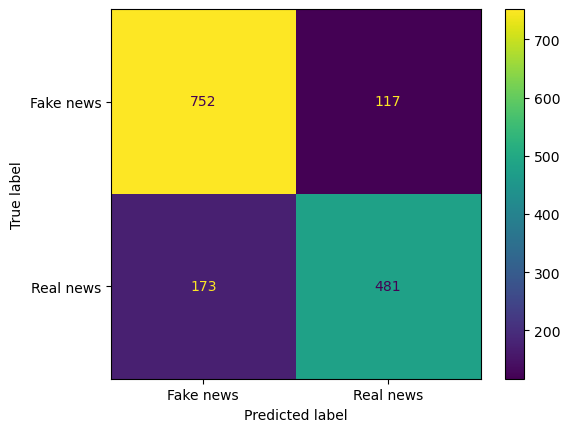

In [26]:
ConfusionMatrixDisplay.from_estimator(
                        clf_bog_nb,
                        X_test,
                        y_test,
                        values_format='d',
                        display_labels=['Fake news','Real news'])

### 🔎 Confusion Matrix 

<div style="width:100%;text-align: center;"> <img align=middle src="https://i.imgur.com/cDhprM7.jpg" style="height: 300px;"> </div>

<br>

Plotting a confusion matrix allow us to have a clear and quick insight to our model performance.

It is very easy to interperate the result from a confusion matrix, basically the 'y-axis' represents the true label and 'x-axis' represents the predicted label.

For example, one can tell from the confusion matrix that

> our model predicted a total of 925 fake news, in which 752 of them is correctly predicted and 173 of them is wrongly predicted

In machine learning, we usually represent this as sensitivity, in which,


<div style="text-align:center; font-size:20px;"> Sensitivity =  $\frac{True Positives}{True Positives + False Negatives}$ </div>

<br>

In our case, the sensitivity will be around 0.8129 (752/(752+173))


<br>
<br>

> our model predicted a total of 559 fake news, in which 468 of them is correctly predicted and 91 of them is wrongly predicted

In machine learning, we usually represent this as specificity, in which,

<div style="text-align:center; font-size:20px;"> Specificity =  $\frac{True Negatives}{True Negatives + False Positives}$ </div>

<br>

In our case, the specificity will be around 0.8043 (481/(481+117))


In [27]:
# You can also run a classification report for more detailed info

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       869
           1       0.80      0.74      0.77       654

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



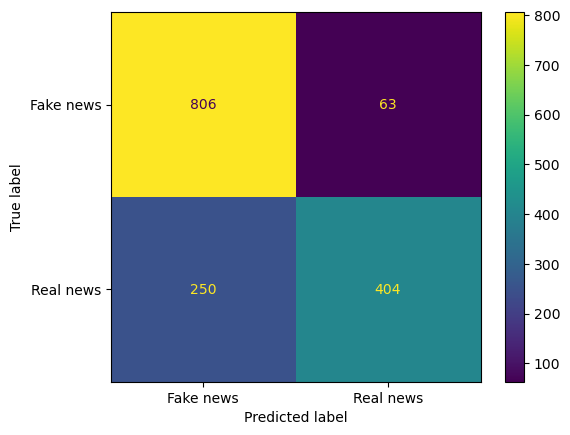

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf_bog_rf = Pipeline([
    ('bag-of-2-grams', CountVectorizer(ngram_range=(1,2))),
    ('rf', RandomForestClassifier())
])

clf_bog_rf.fit(X_train, y_train)

y_pred = clf_bog_rf.predict(X_test)

ConfusionMatrixDisplay.from_estimator(
                        clf_bog_rf,
                        X_test,
                        y_test,
                        values_format='d',
                        display_labels=['Fake news','Real news'])

**Sensitivity of 0.7631, Specificity of 0.8581**

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       869
           1       0.87      0.62      0.72       654

    accuracy                           0.79      1523
   macro avg       0.81      0.77      0.78      1523
weighted avg       0.81      0.79      0.79      1523



### Make submission with Bag of Words | Naive Bayes

Basically what we will do is use the model to predict the test dataset and then import sample submission dataset and change the target inside and export the resultant dataframe.

In [30]:
list(cleaned_test_df.text)[:5]

['happen terrible car crash',
 'hear earthquake different city stay safe',
 'forest fire spot pond geese flee street save',
 'apocalypse lighting spokane wildfire',
 'typhoon soudelor kill 28 china taiwan']

In [31]:
test_pred = clf_bog_nb.predict(list(cleaned_test_df.text))
test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [33]:
sample_submission['target'] = test_pred
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [34]:
sample_submission.target.value_counts()

0    2022
1    1241
Name: target, dtype: int64

Our model predicted 2022 fake disaster and 1241 real disaster

In [35]:
sample_submission.to_csv("BOG_submission.csv", index=False)

The model achieved a score of 0.79987, a rather average model.

# <a id="model-2"></a><div style="text-align:center; font-size:40px;"><span style="color:#3A506B"> 🟡 Model 2: TF-IDF 🟡</span></div>

(To run the code below, all you need to do is to run the two code block in Pipeline section above)

In [36]:
# split the data using sklearn train_test_split to evaluate our model
# basically the idea behind train_test_split is to use a percentage of our training dataset
# to train our model, then use the remaining data to evaluate the performance of the model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cleaned_train_df.text,
    cleaned_train_df.target,
    stratify=cleaned_train_df.target, #stratify allow the split to be split in a way that balance the train and test set by the target column
    test_size=0.2, # 20% of data will be used as test data
    random_state=42) # setting random_state allow the split to be the same everytime you run this

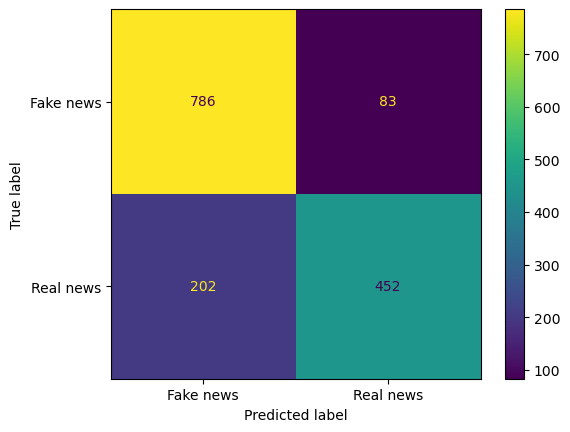

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

clf_tfidf_nb = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('multiNB', MultinomialNB())
])

clf_tfidf_nb.fit(X_train, y_train)

y_pred = clf_tfidf_nb.predict(X_test)

ConfusionMatrixDisplay.from_estimator(
                        clf_tfidf_nb,
                        X_test,
                        y_test,
                        values_format='d',
                        display_labels=['Fake news','Real news'])

**Sensitivity of 0.7955, Specificity of 0.8449**

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       869
           1       0.84      0.69      0.76       654

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.82      0.81      0.81      1523



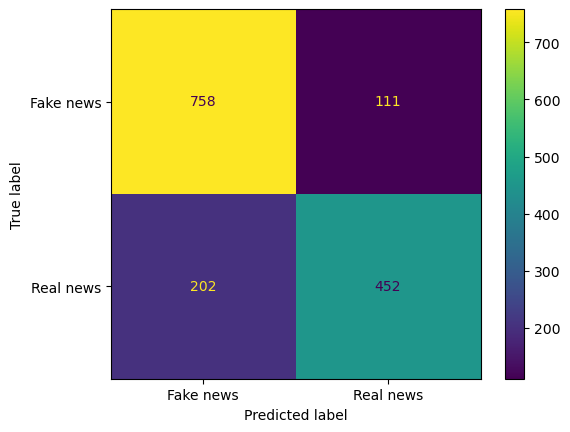

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf_tdidf_rf = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

clf_tdidf_rf.fit(X_train, y_train)

y_pred = clf_tdidf_rf.predict(X_test)

ConfusionMatrixDisplay.from_estimator(
                        clf_tdidf_rf,
                        X_test,
                        y_test,
                        values_format='d',
                        display_labels=['Fake news','Real news'])

**Sensitivity of 0.7915, Specificity of 0.8158**

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       869
           1       0.80      0.69      0.74       654

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.79      0.79      1523



### Make submission wth TF-IDF | Naive Bayes model

In [41]:
list(cleaned_test_df.text)[:5]

['happen terrible car crash',
 'hear earthquake different city stay safe',
 'forest fire spot pond geese flee street save',
 'apocalypse lighting spokane wildfire',
 'typhoon soudelor kill 28 china taiwan']

In [42]:
test_pred = clf_tfidf_nb.predict(list(cleaned_test_df.text))
test_pred

array([1, 0, 1, ..., 1, 1, 1])

In [43]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [44]:
sample_submission['target'] = test_pred
sample_submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [45]:
sample_submission.target.value_counts()

0    2154
1    1109
Name: target, dtype: int64

We see our model predicted 2153 fake disaster and 1109 real disaster

In [46]:
sample_submission.to_csv("TFIDF_submission.csv", index=False)

The mode achieved a 0.79374 score, a rather average model.

# <a id="model-3"></a><div style="text-align:center; font-size:40px;"><span style="color:#3A506B">🔵 Model 3: fastText 🔵</span></div>

(To run the code below, all you need to do is to run the two code block in [Pipeline](#pipeline) section above if you haven't)

In [47]:
import fasttext

PATH = '/kaggle/input/fasttext-english-300/cc.en.300.bin' 
ft_model = fasttext.load_model(PATH)

In our section on fastText, we learn how to do unsupervised training with fastText. In fact, fastText also support the training on supervised training with a specific format that you need to follow. 

Basically, to do supervised training with fastText, we should label our category in the form of 

`__label__1 deed reason earthquake allah forgive`

which is the equivalent of the row 'deed reason earthquake allah forgive' with a target value of 1

**Unsupervised vs Supervised, what's the difference**

❗ *The main difference between supervised and unsupervised learning: Labeled data. The main distinction between the two approaches is the use of labeled datasets. To put it simply, **supervised learning uses labeled input and output data**, while an unsupervised learning algorithm does not*

Now let's tranform our dataset

In [48]:
cleaned_train_df.head()

,text,target
0,deed reason earthquake allah forgive,1
1,forest fire near la ronge sask canada,1
2,resident ask shelter place notify officer evac...,1
3,13000 people receive wildfire evacuation order...,1
4,got send photo ruby alaska smoke wildfire pour...,1


In [49]:
ft_df = cleaned_train_df.copy()
ft_df['target'] = ft_df['target'].apply(lambda x: str(x))
ft_df['labeled_text'] = '__label__' + ft_df['target'] + ' ' + ft_df['text']
ft_df

,text,target,labeled_text
0,deed reason earthquake allah forgive,1,__label__1 deed reason earthquake allah forgive
1,forest fire near la ronge sask canada,1,__label__1 forest fire near la ronge sask canada
2,resident ask shelter place notify officer evac...,1,__label__1 resident ask shelter place notify o...
3,13000 people receive wildfire evacuation order...,1,__label__1 13000 people receive wildfire evacu...
4,got send photo ruby alaska smoke wildfire pour...,1,__label__1 got send photo ruby alaska smoke wi...
...,...,...,...
7608,giant crane hold bridge collapse nearby home,1,__label__1 giant crane hold bridge collapse ne...
7609,ariaahrary thetawniest control wild fire calif...,1,__label__1 ariaahrary thetawniest control wild...
7610,m194 0104 utc5 km s volcano hawaii,1,__label__1 m194 0104 utc5 km s volcano hawaii
7611,police investigate ebike collide car little po...,1,__label__1 police investigate ebike collide ca...


In [50]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ft_df, test_size=0.2)

train.to_csv('twitter_nlp_train.csv', columns=['labeled_text'], index=False, header=False)
test.to_csv('twitter_nlp_test.csv', columns=['text'], index=False, header=False) # we use text since we are using this dateframe to validate our result

In [51]:
# Train the model like how we did with unsupervised

model = fasttext.train_supervised(input='/kaggle/working/twitter_nlp_train.csv')

Read 0M words
Number of words:  13891
Number of labels: 2
Progress: 100.0% words/sec/thread: 2779947 lr:  0.000000 avg.loss:  0.384269 ETA:   0h 0m 0s


In [52]:
# Let's test our model with a sentence from test set
test.iloc[0].text

'crush 31 km run pace 541 nike sportwatch gps nikeplus'

In [53]:
test.iloc[0] # if our model is accurate we should get 1 as label

text            crush 31 km run pace 541 nike sportwatch gps n...
target                                                          0
labeled_text    __label__0 crush 31 km run pace 541 nike sport...
Name: 1899, dtype: object

In [54]:
# we see that our model correctly predicts the target
model.predict("hundred fear drown mediterranean asylum seeker boat sink")

(('__label__1',), array([0.82120919]))

In [55]:
# manually labelling all predictions in a model_predictions list
# let me know if there is a better way/more standard way to do this

y_test = test.target.values
y_pred = []
for i in range(len(test)):
    prediction = model.predict(test.iloc[i].text)
    y_pred.append(prediction[0][0][-1])  # prediction[0][0][-1] and get the 0/1
y_pred[:5]

['1', '0', '0', '0', '0']

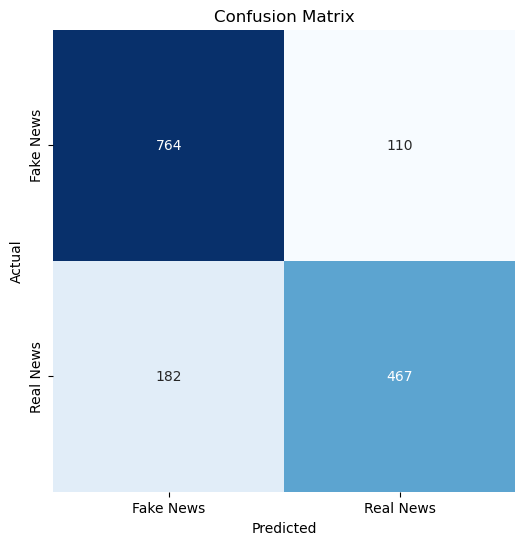

In [56]:
# Plot a confusion matrix manually

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 6))

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, 
            fmt="d", 
            cmap="Blues", 
            cbar=False, 
            square=True,
            xticklabels=["Fake News", "Real News"],
            yticklabels=["Fake News", "Real News"],
            ax=ax)

# Set labels, title, and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")

plt.show()

**Sensitivity of 0.8007 and Specificity of 0.7543**

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       874
           1       0.81      0.72      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



As compared to the previous models, this model doesn't seem to have the best performance. But you can definitely try to improve the preformance by changing the paramaters. 

See more in: https://fasttext.cc/docs/en/supervised-tutorial.html

### Make submission with fastText model

In [58]:
list(cleaned_test_df.text)[:5]

['happen terrible car crash',
 'hear earthquake different city stay safe',
 'forest fire spot pond geese flee street save',
 'apocalypse lighting spokane wildfire',
 'typhoon soudelor kill 28 china taiwan']

In [59]:
test_pred = []
for i in range(len(cleaned_test_df)):
    prediction = model.predict(cleaned_test_df.iloc[i].text)
    test_pred.append(prediction[0][0][-1])  # prediction[0][0][-1] and get the 0/1
test_pred[:5]

['1', '1', '1', '1', '1']

In [60]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [61]:
sample_submission['target'] = test_pred
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [62]:
# we can see our model predicted 1971 fake tweet and 1292 real tweets
sample_submission.target.value_counts()

0    2049
1    1214
Name: target, dtype: int64

In [63]:
# save it as output and submit it
sample_submission.to_csv('fasttext_submission.csv', index=False)

The model got an accuracy of 0.7989, a rather average model.

# <a id="model-4"></a><div style="text-align:center; font-size:40px;"><span style="color:#3A506B">🤗 Model 4: BERT 🤗</span></div>

(To run the code below, all you need to do is to run the two code block in [Pipeline](#pipeline) section above if you haven't)

<div style="width:100%;text-align: center;"> <img align=middle src="https://i.imgur.com/zI7cPLt.png" style="height: 300px;"> </div>

<br>

In this section, instead of downloading the model from tensorflow, we will be trying to use BERT with 🤗 Hugging Face 🤗, in particular, we will be using the bert-base-uncased model.

In [5]:
# split the data using sklearn train_test_split to evaluate our model
# basically the idea behind train_test_split is to use a percentage of our training dataset
# to train our model, then use the remaining data to evaluate the performance of the model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cleaned_train_df.text,
    cleaned_train_df.target,
    stratify=cleaned_train_df.target, #stratify allow the split to be split in a way that balance the train and test set by the target column
    test_size=0.2, # 20% of data will be used as test data
    random_state=42) # setting random_state allow the split to be the same everytime you run this

In [6]:
# Download the models from hugging face

from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [7]:
# tokenize our dataset

X_train_tokenized = tokenizer(list(X_train), padding=True, truncation=True, max_length=512)
X_test_tokenized = tokenizer(list(X_test), padding=True, truncation=True, max_length=512)

In [67]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [68]:
# similar to our BERT section, we tokenized our data with paddings

print(X_train_tokenized['input_ids'][2])

[101, 9587, 8458, 21382, 2502, 14117, 3779, 3291, 2208, 2303, 4524, 9152, 23033, 24728, 9759, 9825, 9286, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
import torch

# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx]),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx])
        }
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [9]:
train_dataset = Dataset(X_train_tokenized, list(y_train))
test_dataset = Dataset(X_test_tokenized, list(y_test))

In [71]:
train_dataset[0]

{'input_ids': tensor([  101, 21871,  6508,  2103,  2611,  2406, 15876,  8950, 11226, 20629,
          3137,  4586, 19718, 20118,  2213, 21307, 14659, 14301,  2063,  2338,
          5092, 14122,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]),
 'labels': tensor(1)}

In [17]:
# log your own metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def compute_metrics(eval_pred):
    predictions = eval_pred.predictions
    labels = eval_pred.label_ids
    pred = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [13]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    output_dir='output',
    num_train_epochs=1,
    per_device_train_batch_size=8
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

In [74]:
# pip install wandb

In [ ]:
# Login to wandb at https://wandb.ai/site
# help you streamline your training process from start to finish
# give you cool charts and stuff to monitor the performance of the model

# uncomment the code below to run wandb

# import wandb
# import random

# # login and enter your api key
# wandb.login()

# # start a new wandb run to track this script
# wandb.init(
#     # set the wandb project where this run will be logged
#     project="nlp-fake-tweet-detection-Kaggle",
# )

In [15]:
trainer.train()

Step,Training Loss
500,0.509500


TrainOutput(global_step=762, training_loss=0.49122602607947324, metrics={'train_runtime': 59.8388, 'train_samples_per_second': 101.773, 'train_steps_per_second': 12.734, 'total_flos': 165867881520600.0, 'train_loss': 0.49122602607947324, 'epoch': 1.0})

In [18]:
trainer.evaluate()

{'eval_loss': 0.3952111005783081,
 'eval_accuracy': 0.8417596848325674,
 'eval_precision': 0.8554216867469879,
 'eval_recall': 0.7599388379204893,
 'eval_f1': 0.8048582995951417,
 'eval_runtime': 3.854,
 'eval_samples_per_second': 395.171,
 'eval_steps_per_second': 49.559,
 'epoch': 1.0}

In [ ]:
wandb.finish()

In [ ]:
# you can save the model as output and reuse the model for future use

trainer.save_model('bert-trained-model')

# load the model

model_2 = BertForSequenceClassification.from_pretrained("/kaggle/working/bert-trained-model")

### Making submission with the BERT model

In [19]:
list(cleaned_test_df.text)[:5]

['happen terrible car crash',
 'hear earthquake different city stay safe',
 'forest fire spot pond geese flee street save',
 'apocalypse lighting spokane wildfire',
 'typhoon soudelor kill 28 china taiwan']

In [20]:
# tokenize the cleaned test df
prediction_tokenized = tokenizer(list(cleaned_test_df.text), padding=True, truncation=True, max_length=512)

In [25]:
input_dataset = Dataset(prediction_tokenized)

In [26]:
predictions = trainer.predict(input_dataset)

In [29]:
predicted_labels = np.argmax(predictions.predictions, axis=1)

predicted_labels

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

sample_submission['target'] = predicted_labels

sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [32]:
sample_submission.target.value_counts()

0    2072
1    1191
Name: target, dtype: int64

In [33]:
sample_submission.to_csv("BERT_submission.csv",index=False)

The model achieved a rather impressive score of 0.82807 as comparing to other models!

# <a id="improvements"></a><div style="text-align:center; font-size:40px;"><span style="color:#3A506B">🤔 What can I do to improve the model 🤔</span></div>

### 1️⃣ Do more text cleaning

It is said that data scientist usually spent 80% of their time cleaning data. Data cleaning is an extremely important step to grab a valuable insight to the dataset. This is exceptionally true for this dataset as if you look deeper to your dataset, you will find that the quality of text for twitter messages are pretty poor and require lots of cleaning. 

Try to put some extra effort in cleaning the dataset to get a more accurate result!

### 2️⃣ Hyperparameter Tuning

There are a lot of parameters you can optimize when you are using the models. One important step to improve the model performance will be to try out the performance of the model on different parameters to get a more accurate result.

### 3️⃣ Try out different models

In this notebook, we used 4 different models particularly, Bag of Words, TF-IDF, fastText and BERT model to make predictions. Try out different models like Word2Vec or GloVE or even use more complicated deep learning algorithms like LSTM to achieve a better result!

<a id="hey-there"></a><div style="text-align:center; font-size:40px;"><span style="color:#3A506B">👋 Hey there 👋</span></div>

### 🌟 About the Author

Hey there, I am an undergraduate majoring in quantitative finance at the Univeristy of Hong Kong. I am a highly motivated person with a huge passion in mathematics and computer science related topics. 

When I said I am a beginner in the start of the notebook, I am not lying! In fact, I am a self learner in the field of machine learning and natural language processing, and as the moment I am writing this, I have only started my machine learning journey for a couple of months. 

Although I do not have a lot of experience and knowlegde in the field, I am more than happy to connect and learn/work together in some projects and stuff like that.

Do you know Kaggle got discord server? https://discord.gg/kaggle (crxxom) <br>
My Linkedin: https://www.linkedin.com/in/jadon-ng-848a48263/

### 🌟 Upvote the notebook!

If you find the notebook useful, it will be great if you can show some support by upvoting the notebook, it means a lot to me! 

Also, if you want to make suggestions/corrections to the content of this notebook, don't hesitate to comment your thoughts, I will reply you as soon as possible.

One more thing, if you want to share some of your resources/notebooks, comment down your links in the comment section and let us learn! 


### 🌟 Will there be updates?

As in for now, I will only be updating the notebook if there are some incorrect information or if I discover some useful resources to share. 